# Lecture 4: Prequel to NLA

## Previous lectures

- (end of) Orthogonal basis
- Linear operators
- Linear functionals, Riesz, Banach-Steinhaus, Hanh-Banach theorems

## Summary of the functional analysis part

- Metric spaces, complete metric spaces, Banach spaces, Hilbert spaces
- Linear operators, linear functional, dual spaces
- Hanh-Banach theorem, Banach-Steinhaus theorem, Riecz theorem, contraction mapping theorem

## Todays lecture
- Linear operators in finite dimensional spaces
- Matrix-by-vector product
- Some examples

## Linear operator as a matrix

A linear operator from $\mathbb{C}^n$ to $\mathbb{C}^m$, given the standard basis in each of the spaces, can be written as a **matrix** $A$ with elements $A_{ij} = (A(e_j))_i$.

Example for $n = m = 3$

\begin{equation}
A = \begin{pmatrix}
a_{11} & a_{12} & a_{13} \\
a_{21} & a_{22} & a_{23} \\
a_{31} & a_{32} & a_{33}
\end{pmatrix}.
\end{equation}

A vector is a $n \times 1$ matrix (there are **row** and **column** vectors, as $1 \times n$ and $n \times 1$ matrices)

It very convenient to work with matrices as two-dimensional tables. 

## What we can do with matrices

1. Add them and multiply by numbers
2. Multiply matrices of consistent sizes
3. Compute inverses
4. Actually many more, and it is all based on **matrix factorizations**

## Linear dependencies
Many physical models are formulated as **linear equations**:

- Newton law $F = ma$
- Hookes law $F = kx$

which is based on the fact that if the change is small, everything can be approximated by a linear function:
$$
   f(x + \delta x) \approx f(x) + \delta x f'(x).
$$
Of course, nonlinearities may come into play, but even in this case the numerical methods **linearize** the problem around the current approximation. But matrices and linear dependence also play important role in data analysis as well.

## Linear dependencies in real life
Matrix encodes linear dependence.  

Linear  regression is the simplest and often very efficient model for the data. 

I will give three illustrations: 
- Linear regression
- Principal component analysis
- Independent component analysis

## Linear regression

A linear regression is the determination of $A$ and $b$ given data points $(x_i, y_i)$

where $x_i$ are **feautures** and $y_i$ are targets,

$$y_i = A x_i+ b + \epsilon,$$

where $\epsilon$ is some sort of noise.

The bias term can be incorporated into $x$

In the matrix form we have

$$
   Y = AX + E
$$

How we solve for $A$, if we know $Y$ and $X$?


## Solving for a linear regression

How to find $A$ that minimizes

$$\Vert Y - A X \Vert_F \to \min,$$

where we have silently introduced the **Frobenius matrix norm** 

$$\Vert X \Vert_F = \sum_{ij} \mid X_{ij} \mid^2.$$

(Btw, if this norm an operator norm?)

Let us do it on a whiteboard, there are two derivations.

## Demo: principal component analysis

Supposer we observe only $y_i$, and $x_i$ and are not known.

Then we have the model

$$Y \approx A X.$$

A typical case is that $Y = [y_1, \ldots, y_N]$ and $y_i \in \mathbb{R}^n$,

and $X = [x_1, \ldots, x_N]$, $x_i \in \mathbb{R}^m$, $n \gg m$.

This is the proble of dimensionality reduction, i.e. all points $y_i$ lie on a $m$-dimensional hyperplane in $\mathbb{R}^n$.

## Demo: principal component analysis
One of the basic factor models, factor analysis:  

$y_1, \ldots, y_P$ are vectors (data points), that are observed.


We think of the as **linear mixture**. We generate random points on a plane and then rotate them
by a certain mixture.

We generate a sequence of random points in two dimensions, and setup a rotation matrix $A$.

/home/ivan/miniconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'Humor Sans', u'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


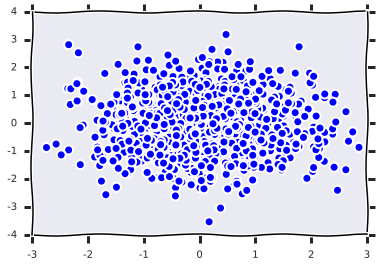

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np
plt.xkcd()

P = 1000
points = np.random.randn(P,2)
A = [[2, 1], [0, 1]] 
A = np.array(A)
plt.plot(points[:, 0], points[:, 1], ls='', marker='o')

We can also plot the rotated points: look at how they are "skewed".

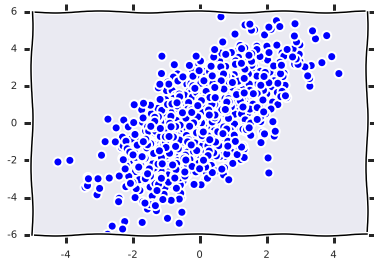

In [8]:
R = np.dot(points, A)
#plt.plot(R[:, 0], R[:, 1], ls='', marker='o')
u, s, v  = np.linalg.svd(R, full_matrices=False)
R1 = R.dot(v)bb
plt.plot(R1[:, 0], R1[:, 1], ls='', marker='o')


We can also rotate them back by finding **principal components**, which is equivalent to singular value decomposition (SVD). 

If you do not know what it is, do not worry <font color='red'> now </font>

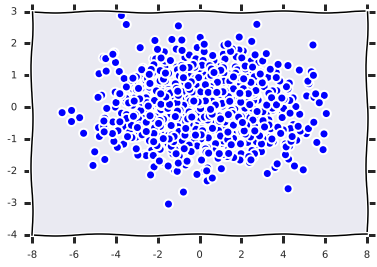

In [12]:
%matplotlib inline
u, s, v = np.linalg.svd(R, full_matrices=False)
unrotated = R.dot(v.T)
plt.plot(unrotated[:, 0], unrotated[:, 1], ls='', marker='o')
#plt.plot(points[:, 0], points[:, 1], ls='', marker='x')

## PCA problem

PCA is non-unique, since if 

$$Y = A X,$$ then

$$Y = (A S^{-1}) (S X)$$

For any nonsingular $m \times m$ matrix $S$.

The "uniqueness" in PCA is realized by requiring that the **mixing matrix** is **orthogonall**.

In many cases, this is the **unphysical assumption**.

## Demo: Cocktail party problem
The linear models and the factors may have a real physical meaning. 

One of the most interesting illustrations is the **cocktail party problem**, which is defined as follows.

We have a set of sources $x(t)$ (people talking) and a set of microphones.  

At each microphone we record a **linear mixture**:
$$
    y = A x(t) + \eta(t),
$$
where $\eta(t)$ is some noise. 

We do not know $A$ and want to recover it. 

[Demo](bss1.ipynb)

## How ICA works

This is called Independent component analysis (ICA).

How it works? 

In the model $$Y \approx A X$$

We have fewer equations than unknowns, thus we need additional assumptions on $X$.

We assume that $x_i$ are **random variables** which are independent.

Independence is an **infinite number** of equations.

## NLA course summary## (Approximate) Syllabus

- **Week 1:** Python crash course, floating points arithmetics, some games with matrices
- **Week 2:** Matrices, vectors, norms, ranks
- **Week 3:** Linear systems, eigenvectors, eigenvalues 
- **Week 4:** Matrix decompositions (LU, QR, SVD) + test
- **Week 5:** Sparse matrices and structured matrices
- **Week 6:** Iterative methods / preconditioners / matrix functions
- **Week 7:** Ping-pong + written test
- **Week 8:** Application period

From advanced topics, we will try to cover **compressed sensing**, **image processing** and **tensor factorizations**.


In [2]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()